$$\large{Background}$$ 

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from scipy.stats import poisson

In [47]:
data = np.load('./data_HE.npy') 
rd.seed()

psi_bg = data[0]
Dec = data[1]
Ra = data[2]

pi = np.pi

In [48]:
# Rice criterion : 

bin_bg = 2*(len(Ra)**(1/3))
print('2D :')
print('\n Rice criterion : k = ', round(bin_bg,3))
print('\n taille échantillon : ', len(Ra))

bin_psi = 2*(len(psi_bg)**(1/3))
print('\n 1D : ')
print('\n Rice criterion : k = ', round(bin_psi,3))
print('\n taille échantillon psi : ', len(psi_bg))

2D :

 Rice criterion : k =  56.202

 taille échantillon :  22190

 1D : 

 Rice criterion : k =  56.202

 taille échantillon psi :  22190


In [49]:
def angle_solide(angle):
    return np.pi*angle**2

def psi_f(RA,decl):
    return np.arccos(np.cos(np.pi/2.-(-29.*np.pi/180))*np.cos(np.pi/2.-decl)\
                      +np.sin(np.pi/2.-(-29.*np.pi/180))*np.sin(np.pi/2.-decl)*\
                       np.cos(RA-266.*np.pi/180))

Text(0, 0.5, '$Dec$ (deg)')

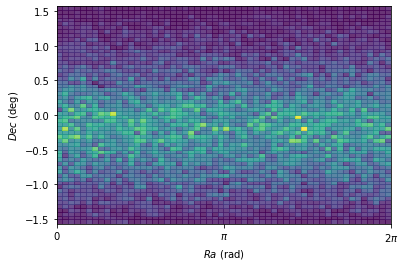

In [6]:
plt.figure()
Value_bg_2D = plt.hist2d(Ra,Dec, bins = [int(bin_bg),int(bin_bg)], density = True, alpha = 0.8)
plt.xticks(np.arange(0,2*pi+1,pi), ['0', '$\pi$', '$2 \pi$'])
plt.xlabel('$Ra$ (rad)')
plt.ylabel('$Dec$ (deg)')

$$ \large{H_0 = \mathcal{B}(\psi)} $$

Text(0, 0.5, 'Densité')

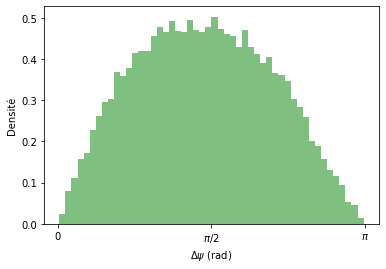

In [50]:
plt.figure()
Value_bg_psi = plt.hist(psi_bg, bins = 50, density = True, color = "green", alpha = 0.5)
plt.xticks(np.arange(0,pi+1,pi/2), ['0', '$\pi / 2$', '$ \pi$'])
plt.xlabel('$\Delta \psi$ (rad)')
plt.ylabel('Densité')

$$ \large{Signal} $$ 

In [51]:
data_dm = np.load('./Signal_1000GeV.pkl',allow_pickle=True, encoding="latin1")

w = data_dm['weigths']
psi_rec = data_dm['psi_rec']
scrambled_psi = data_dm['scrambled_psi_reco']
E_reco = data_dm['energy_rec']

mean = [-266,-29]
sigma = [[5,0],[0,5]] 
RA_gauss, DEC_gauss = np.random.multivariate_normal(mean,sigma,len(psi_rec-2)).T
psi_gauss = psi_f(RA_gauss,DEC_gauss)

In [52]:
print('Taille psi_rec \n', len(psi_rec),'\n Taille scrambled_psi ', len(scrambled_psi), '\n Taille w', len(w))

max_w = np.max(w)
i = np.where(w == np.max(w))
w = np.delete(w,i)
psi_rec = np.delete(psi_rec,i)

print('Taille psi_rec \n', len(psi_rec),'\n Taille scrambled_psi ', len(scrambled_psi), '\n Taille w', len(w))

Taille psi_rec 
 59543400 
 Taille scrambled_psi  59543400 
 Taille w 59543400
Taille psi_rec 
 59543399 
 Taille scrambled_psi  59543400 
 Taille w 59543399


In [53]:
scrambled_psi = np.delete(scrambled_psi,i)

In [54]:
bin_signal = 2*(len(psi_rec)**(1/3))
print('bin signal :', bin_signal)

bin_signal_scr = 2*(len(scrambled_psi)**(1/3))
print('\n bin signal scr :',bin_signal_scr)

bin signal : 780.9823214204089

 bin signal scr : 780.9823214204089


In [ ]:
data_dm

$$ \large{ H_1 = \xi \mathcal{S}(\psi) + (1 - \xi)\mathcal{B}(\psi)}\xi$$

Text(0, 0.5, 'Densité')

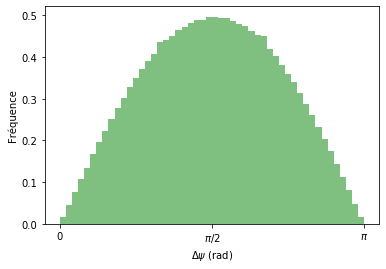

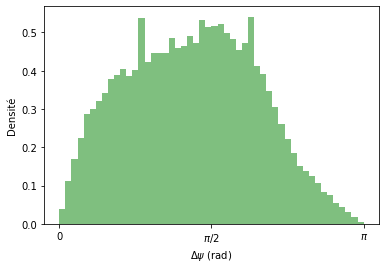

In [55]:
plt.figure()
plt.hist(scrambled_psi, bins = 50, color = "green", alpha = 0.5, density = True)
plt.xlabel('$\Delta \psi$ (rad)')
plt.xticks(np.arange(0,pi+1,pi/2), ['0', '$\pi / 2$', '$ \pi$'])
plt.ylabel('Fréquence')

plt.figure()
plt.hist(scrambled_psi, bins = 50, weights = w, color = "green", alpha = 0.5, density = True, stacked = True)
plt.xlabel('$\Delta \psi$ (rad)')
plt.xticks(np.arange(0,pi+1,pi/2), ['0', '$\pi / 2$', '$ \pi$'])
plt.ylabel('Densité')

$$\Large\text{Signal à utiliser $S(\psi)$}$$

Text(0, 0.5, 'Densité')

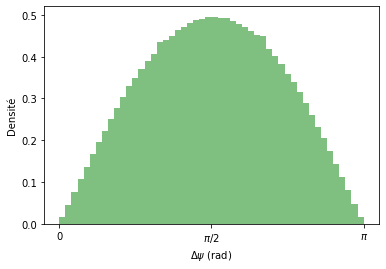

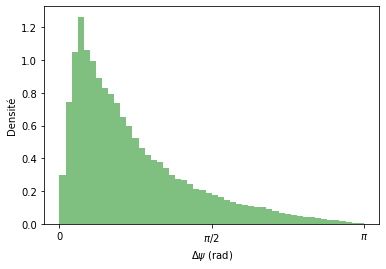

In [56]:
plt.figure()
plt.hist(psi_rec, bins = 50, color = "green", alpha = 0.5, density = True)
plt.xlabel('$\Delta \psi$ (rad)')
plt.xticks(np.arange(0,pi+1,pi/2), ['0', '$\pi / 2$', '$ \pi$'])
plt.ylabel('Densité')

plt.figure()
signal_hist_w = plt.hist(psi_rec, bins = 50, weights = w, color = "green", alpha = 0.5, density = True, align = 'mid')
plt.xlabel('$\Delta \psi$ (rad)')
plt.xticks(np.arange(0,pi+1,pi/2), ['0', '$\pi / 2$', '$ \pi$'])
plt.ylabel('Densité')

$$ \large\textit{Likelihood method : comparaison modèle simulé/bruit de fond avec signal/bruit de fond} $$

$$ \textbf{On cherche $\xi$ tel que la vraisemblance est max} $$

$$ \large{H_0 = \mathcal{B}(\psi)} $$

$$ \large{ H_1 = \xi \mathcal{S}(\psi) + (1 - \xi)\mathcal{B}(\psi)\xi,  \; \xi \in [0;1] } $$

$$\frac{H_1}{H_0} = TS \iff \frac{H_1}{H_0} = \frac{\xi \mathcal{S}(\psi)}{\mathcal{B}(\psi)} + (1-\xi) $$

In [21]:
print('signal :', len(psi_rec), '\n backgnd :', len(psi_bg)) 

signal : 59543399 
 backgnd : 22190


$$ \textbf{Psi_test avec données} $$ 

In [57]:
n = 0.90
Nb = int(n*len(psi_bg))
Ns = int((1-n)*len(psi_bg))

frac_bg = np.random.choice(psi_bg, Nb)
frac_s = np.random.choice(psi_rec, Ns, p = w/(np.sum(w)))

print('Taille frac_bg :', len(frac_bg), 'frac_s :', len(frac_s))

psi_test = np.concatenate((frac_bg,frac_s), axis = None)
print('Taille psi test :', len(psi_test))

Taille frac_bg : 19971 frac_s : 2218
Taille psi test : 22189


$$\textbf{Psi test}$$ 

Text(0, 0.5, "Nb d'événements")

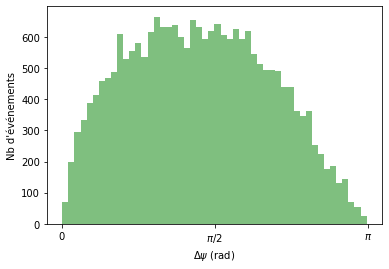

In [58]:
plt.figure()
psi_test_hist = plt.hist(psi_test, bins = 50, color = "green", alpha = 0.5)
plt.xlabel('$\Delta \psi$ (rad)')
plt.xticks(np.arange(0,pi+1,pi/2), ['0', '$\pi / 2$', '$ \pi$'])
plt.ylabel("Nb d'événements")

$$ \large\textbf{Vraisemblance} $$

$$ \mu_i = N_T[(1-\lambda)B_i + \lambda S_i] $$ 
$$ \text{poisson.cdf(x,mu,loc)} $$ 

In [33]:
print('values :', psi_test_hist[0], '\n bins :', psi_test_hist[1])

values : [ 78. 187. 299. 334. 411. 418. 439. 475. 516. 512. 542. 550. 599. 543.
 523. 652. 647. 657. 655. 610. 585. 680. 628. 639. 624. 655. 599. 554.
 560. 577. 582. 526. 537. 510. 523. 445. 454. 417. 370. 375. 380. 252.
 248. 204. 158. 173. 111.  88.  61.  27.] 
 bins : [0.00959239 0.07180347 0.13401455 0.19622562 0.2584367  0.32064778
 0.38285886 0.44506994 0.50728102 0.56949209 0.63170317 0.69391425
 0.75612533 0.81833641 0.88054749 0.94275857 1.00496964 1.06718072
 1.1293918  1.19160288 1.25381396 1.31602504 1.37823612 1.44044719
 1.50265827 1.56486935 1.62708043 1.68929151 1.75150259 1.81371366
 1.87592474 1.93813582 2.0003469  2.06255798 2.12476906 2.18698014
 2.24919121 2.31140229 2.37361337 2.43582445 2.49803553 2.56024661
 2.62245769 2.68466876 2.74687984 2.80909092 2.871302   2.93351308
 2.99572416 3.05793523 3.12014631]


In [59]:
def likelihood(lamb,B,S,psi):
    L = 0
    bins = psi[1]
    mu = np.ones(len(bins))

    for i in range(len(bins)-1):
        mu[i] = len(psi[0])*((1-lamb[i])*B[0][i] + lamb[i]*S[0][i])
        print('mu = ', mu[i])
        print('lambda = ', lamb[i])
        L += poisson.pmf(psi[0][i],mu[i], loc = 0)
        print('\n L :', L)
        
# On doit trouver le lambda qui maximise L : essayer plusieurs valeurs de lambda (range entre 0 et 1)

Nvalues = len(psi_test_hist[0])
lamb = np.linspace(0,1,Nvalues)
L = np.ones(len(lamb)-1)

for k in range(len(lamb)-1):
    L[k] = likelihood(lamb, Value_bg_psi, signal_hist_w, psi_test_hist)

print('L :', L)
i_max = np.where(L == np.max(L))
lambda_max = lamb[i_max]
print('\n lambda max :', lambda_max)

mu =  1.1948457329701396
lambda =  0.0

 L : 6.523920244685691e-96
mu =  4.699201056840992
lambda =  0.02040816326530612

 L : 6.523920244685691e-96
mu =  7.454921043381356
lambda =  0.04081632653061224

 L : 6.523920244685691e-96
mu =  11.215013799574972
lambda =  0.061224489795918366

 L : 6.523920244685691e-96
mu =  12.255924763310292
lambda =  0.08163265306122448

 L : 6.523920244685691e-96
mu =  15.339891859266563
lambda =  0.1020408163265306

 L : 6.523920244685691e-96
mu =  16.920161037700083
lambda =  0.12244897959183673

 L : 6.523920244685691e-96
mu =  18.548560578832806
lambda =  0.14285714285714285

 L : 6.523920244685691e-96
mu =  19.14721687087144
lambda =  0.16326530612244897

 L : 6.523920244685691e-96
mu =  21.81169610058206
lambda =  0.18367346938775508

 L : 6.523920244685691e-96
mu =  20.917690808388954
lambda =  0.2040816326530612

 L : 6.523920244685691e-96
mu =  21.407226807789648
lambda =  0.22448979591836732

 L : 6.523920244685691e-96
mu =  22.037918195710603
